# Monte Carlo draws for sibship likelihood estimation

These simulations test how the likelihood of sibship partitions changes as the number of fathers increases, and as we allow for more Monte Carlo draws. This is done for four contrasting demographic scenarios:

1. Even sibship sizes
2. Many small sibships
3. A single large sibship
4. Reproductive skew (where a single sire dominates the family).

For these simulations, we'll assume sampling of the adults population is complete. In each simulation allele frequencies are drawn from a uniform distribition between 0.25 and 0.5.

We'll use the same set of parameters for each scenario, and assess each possible combination:

In [1]:
import numpy as np
from faps import *
# packages for plotting the results:
#import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

# Common simulation parameters
r            = 300 # number of replicates
nloci        = 50 # number of loci
allele_freqs = [0.25, 0.5] # draw allele frequencies 
nadults      = [100,250,500,1000,2000] # size of the adults population
mu           = 0.0015 #genotype error rates
ndraws       = [10, 100, 1000, 10000]

Populating the interactive namespace from numpy and matplotlib


## Even sibships

Four families of five offspring.

In [24]:
sires     = 4
offspring = 5

np.random.seed(417)
acc_10,    cluster_10    = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[0], return_clusters=True, verbose=False)
acc_100,   cluster_100   = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[1], return_clusters=True, verbose=False)
acc_1000,  cluster_1000  = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[2], return_clusters=True, verbose=False)
acc_10000, cluster_10000 = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[3], return_clusters=True, verbose=False)
# pull out the proportion of the total posterior distribution being sampled
ix = np.array([np.where(acc_10.n_adults == x)[0] for x in nadults])
even_liks = np.array([
    np.exp(np.array([[alogsumexp(cluster_10[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_100[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_1000[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_10000[x].lik_partitions) for x in i] for i in ix])).mean(1)
    ])
# pull out the accuracy of sibship reconstruction.
even_likfs = np.array([
    [acc_10.acc_fs[   acc_10.n_adults    == x].mean() for x in nadults],
    [acc_100.acc_fs[  acc_100.n_adults   == x].mean() for x in nadults],
    [acc_1000.acc_fs[ acc_1000.n_adults  == x].mean() for x in nadults],
    [acc_10000.acc_fs[acc_10000.n_adults == x].mean() for x in nadults]
])

# save data tables
np.savetxt('../data_files/evenliks.csv', even_liks, delimiter=',', fmt="%5.4f", comments='')
np.savetxt('../data_files/even_likfs.csv', even_likfs, delimiter=',', fmt="%5.4f", comments='')
del acc_10, acc_100, acc_1000, acc_10000, cluster_10, cluster_100, cluster_1000, cluster_10000

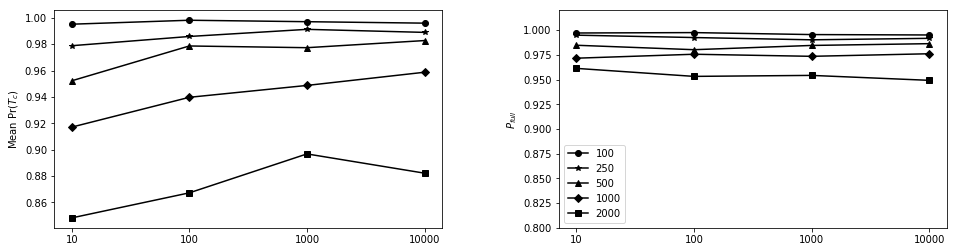

In [29]:
even_liks  = np.genfromtxt('../data_files/evenliks.csv', delimiter=',')
even_likfs = np.genfromtxt('../data_files/even_likfs.csv', delimiter=',')

fig = plt.figure(figsize=(16, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.1)

plotcodes = ['-ok','-*k','-^k','-Dk','-sk']

elik = fig.add_subplot(1,2,1)
elik.set_xlabel('')
elik.set_ylabel('Mean Pr($T_c$)')
#elik.set_xlim(0.85,4.15)
#elik.set_ylim(0.8,1.02)
elik.set_xticks(range(1,5))
elik.set_xticklabels([10,100,1000,10000])
for i in range(5):
    elik.plot([1,2,3,4], even_liks[:,i], plotcodes[i], label=nadults[i])
#elik.legend(loc='best')

efs = fig.add_subplot(1,2,2)
efs.set_xlabel('')
efs.set_ylabel('$P_{full}$')
efs.set_xlim(0.85,4.15)
efs.set_ylim(0.8,1.02)
efs.set_xticks(range(1,5))
efs.set_xticklabels([10,100,1000,10000])
for i in range(5):
    efs.plot([1,2,3,4], even_likfs[:,i], plotcodes[i], label=nadults[i])

efs.legend(loc='best')

## 2. Many sibships

Twenty families of a single offspring.

In [31]:
sires     = 20
offspring = 1

np.random.seed(57)
acc_10,    cluster_10    = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[0], return_clusters=True, verbose=False)
acc_100,   cluster_100   = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[1], return_clusters=True, verbose=False)
acc_1000,  cluster_1000  = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[2], return_clusters=True, verbose=False)
acc_10000, cluster_10000 = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[3], return_clusters=True, verbose=False)

ix = np.array([np.where(acc_10.n_adults == x)[0] for x in nadults])
many_liks = np.array([
    np.exp(np.array([[alogsumexp(cluster_10[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_100[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_1000[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_10000[x].lik_partitions) for x in i] for i in ix])).mean(1),
    ])
# pull out the accuracy of sibship reconstruction.
many_likfs = np.array([
    [acc_10.acc_hs[   acc_10.n_adults    == x].mean() for x in nadults],
    [acc_100.acc_hs[  acc_100.n_adults   == x].mean() for x in nadults],
    [acc_1000.acc_hs[ acc_1000.n_adults  == x].mean() for x in nadults],
    [acc_10000.acc_hs[acc_10000.n_adults == x].mean() for x in nadults]
])

# save data tables
np.savetxt('../data_files/manyliks.csv', many_liks, delimiter=',', fmt="%5.4f", comments='')
np.savetxt('../data_files/many_likfs.csv', many_likfs, delimiter=',', fmt="%5.4f", comments='')

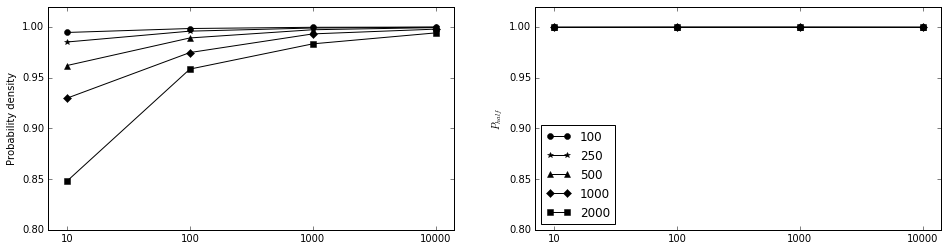

In [85]:
many_liks  = np.genfromtxt('../data_files/manyliks.csv', delimiter=',')
many_likfs = np.genfromtxt('../data_files/many_likfs.csv', delimiter=',')

fig = plt.figure(figsize=(16, 4))
plotcodes = ['-ok','-*k','-^k','-Dk','-sk']

mlik = fig.add_subplot(1,2,1)
mlik.set_xlabel('')
mlik.set_ylabel('Probability density')
mlik.set_xlim(0.85,4.15)
mlik.set_ylim(0.8,1.02)
mlik.set_xticks(range(1,5))
mlik.set_xticklabels([10,100,1000,10000])
for i in range(5):
    mlik.plot([1,2,3,4], many_liks[:,i], plotcodes[i], label=nadults[i])
#mlik.legend(loc='best')

mfs = fig.add_subplot(1,2,2)
mfs.set_xlabel('')
mfs.set_ylabel('$P_{half}$')
mfs.set_xlim(0.85,4.15)
mfs.set_ylim(0.8,1.02)
mfs.set_xticks(range(1,5))
mfs.set_xticklabels([10,100,1000,10000])
for i in range(5):
    mfs.plot([1,2,3,4], many_likfs[:,i], plotcodes[i], label=nadults[i])

mfs.legend(loc='best')

## 3. No sibships

One family of twenty offspring.

In [26]:
sires     = 1
offspring = 20

np.random.seed(31)
acc_10,    cluster_10    = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[0], return_clusters=True, verbose=False)
acc_100,   cluster_100   = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[1], return_clusters=True, verbose=False)
acc_1000,  cluster_1000  = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[2], return_clusters=True, verbose=False)
acc_10000, cluster_10000 = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[3], return_clusters=True, verbose=False)

ix = np.array([np.where(acc_10.n_adults == x)[0] for x in nadults])
sing_liks = np.array([
    np.exp(np.array([[alogsumexp(cluster_10[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_100[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_1000[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_10000[x].lik_partitions) for x in i] for i in ix])).mean(1)
    ])


# pull out the accuracy of sibship reconstruction.
sing_likfs = np.array([
    [acc_10.acc_fs[   acc_10.n_adults    == x].mean() for x in nadults],
    [acc_100.acc_fs[  acc_100.n_adults   == x].mean() for x in nadults],
    [acc_1000.acc_fs[ acc_1000.n_adults  == x].mean() for x in nadults],
    [acc_10000.acc_fs[acc_10000.n_adults == x].mean() for x in nadults]
])

# save data tables
np.savetxt('../data_files/singliks.csv', sing_liks, delimiter=',', fmt="%5.4f", comments='')
np.savetxt('../data_files/sing_likfs.csv', sing_likfs, delimiter=',', fmt="%5.4f", comments='')

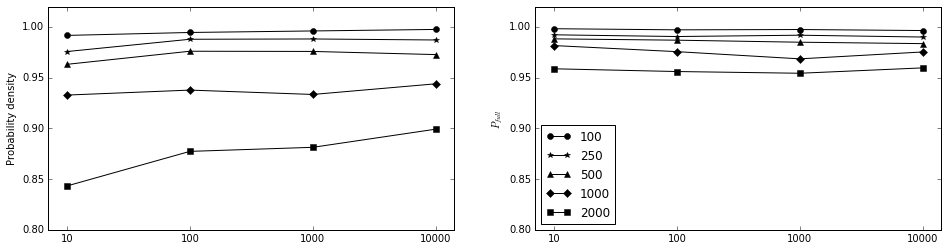

In [78]:
sing_liks  = np.genfromtxt('../data_files/singliks.csv', delimiter=',')
sing_likfs = np.genfromtxt('../data_files/sing_likfs.csv', delimiter=',')

fig = plt.figure(figsize=(16, 4))
plotcodes = ['-ok','-*k','-^k','-Dk','-sk']

slik = fig.add_subplot(1,2,1)
slik.set_xlabel('')
slik.set_ylabel('Probability density')
slik.set_xlim(0.85,4.15)
slik.set_ylim(0.8,1.02)
slik.set_xticks(range(1,5))
slik.set_xticklabels([10,100,1000,10000])
for i in range(5):
    slik.plot([1,2,3,4], sing_liks[:,i], plotcodes[i], label=nadults[i])
#slik.legend(loc='best')

sfs = fig.add_subplot(1,2,2)
sfs.set_xlabel('')
sfs.set_ylabel('$P_{full}$')
sfs.set_xlim(0.85,4.15)
sfs.set_ylim(0.8,1.02)
sfs.set_xticks(range(1,5))
sfs.set_xticklabels([10,100,1000,10000])
for i in range(5):
    sfs.plot([1,2,3,4], sing_likfs[:,i], plotcodes[i], label=nadults[i])

sfs.legend(loc='best')

## 4. Skew

One family of ten offspring and ten families of a single offspring.

In [27]:
sires     = range(1,12)
offspring = [10] + [1]*10

np.random.seed(945)
acc_10,    cluster_10    = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[0], return_clusters=True, verbose=False)
acc_100,   cluster_100   = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[1], return_clusters=True, verbose=False)
acc_1000,  cluster_1000  = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[2], return_clusters=True, verbose=False)
acc_10000, cluster_10000 = make_power(r, nloci, allele_freqs, nadults, sires, offspring, 0, mu, mu, cluster_draws=ndraws[3], return_clusters=True, verbose=False)

ix = np.array([np.where(acc_10.n_adults == x)[0] for x in nadults])
skew_liks = np.array([
    np.exp(np.array([[alogsumexp(cluster_10[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_100[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_1000[x].lik_partitions) for x in i] for i in ix])).mean(1),
    np.exp(np.array([[alogsumexp(cluster_10000[x].lik_partitions) for x in i] for i in ix])).mean(1)
    ])

# pull out the accuracy of sibship reconstruction.
skew_likfs = np.array([
    [acc_10.acc_fs[   acc_10.n_adults    == x].mean() for x in nadults],
    [acc_100.acc_fs[  acc_100.n_adults   == x].mean() for x in nadults],
    [acc_1000.acc_fs[ acc_1000.n_adults  == x].mean() for x in nadults],
    [acc_10000.acc_fs[acc_10000.n_adults == x].mean() for x in nadults]
])

# save data tables
np.savetxt('../data_files/skewliks.csv', skew_liks, delimiter=',', fmt="%5.4f", comments='')
np.savetxt('../data_files/skew_likfs.csv', skew_likfs, delimiter=',', fmt="%5.4f", comments='')

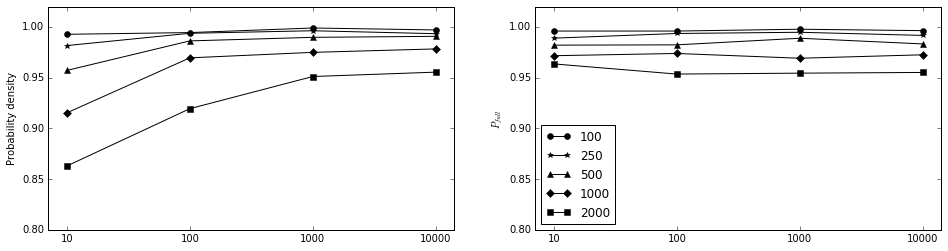

In [79]:
skew_liks  = np.genfromtxt('../data_files/skewliks.csv', delimiter=',')
skew_likfs = np.genfromtxt('../data_files/skew_likfs.csv', delimiter=',')

fig = plt.figure(figsize=(16, 4))
plotcodes = ['-ok','-*k','-^k','-Dk','-sk']

klik = fig.add_subplot(1,2,1)
klik.set_xlabel('')
klik.set_ylabel('Probability density')
klik.set_xlim(0.85,4.15)
klik.set_ylim(0.8,1.02)
klik.set_xticks(range(1,5))
klik.set_xticklabels([10,100,1000,10000])
for i in range(5):
    klik.plot([1,2,3,4], skew_liks[:,i], plotcodes[i], label=nadults[i])
#klik.legend(loc='best')

kfs = fig.add_subplot(1,2,2)
kfs.set_xlabel('')
kfs.set_ylabel('$P_{full}$')
kfs.set_xlim(0.85,4.15)
kfs.set_ylim(0.8,1.02)
kfs.set_xticks(range(1,5))
kfs.set_xticklabels([10,100,1000,10000])
for i in range(5):
    kfs.plot([1,2,3,4], skew_likfs[:,i], plotcodes[i], label=nadults[i])

kfs.legend(loc='best')

## Single plot

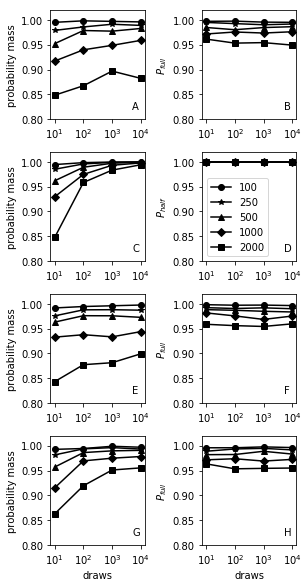

In [4]:
fig = plt.figure(figsize=(11.2/2.54, 25/2.54))
fig.subplots_adjust(wspace=0.6, hspace=0.3)

plotcodes = ['-ok','-*k','-^k','-Dk','-sk']
xlabs = ['$10^1$','$10^2$','$10^3$','$10^4$']

# Even sibships
even_liks  = np.genfromtxt('../data_files/evenliks.csv', delimiter=',')
even_likfs = np.genfromtxt('../data_files/even_likfs.csv', delimiter=',')
# Prob density
elik = fig.add_subplot(4,2,1)
elik.set_xlabel('')
elik.set_ylabel('probability mass')
elik.set_xlim(0.85,4.15)
elik.set_ylim(0.8,1.02)
elik.set_xticks(range(1,5))
elik.set_xticklabels(xlabs)
for i in range(5):
    elik.plot([1,2,3,4], even_liks[:,i], plotcodes[i], label=nadults[i])
elik.annotate('A', xy = [2,1], xytext=[3.7,0.82])
# Full sib reconstruction
efs = fig.add_subplot(4,2,2)
efs.set_xlabel('')
efs.set_ylabel('$P_{full}$')
efs.set_xlim(0.85,4.15)
efs.set_ylim(0.8,1.02)
efs.set_xticks(range(1,5))
efs.set_xticklabels(xlabs)
for i in range(5):
    efs.plot([1,2,3,4], even_likfs[:,i], plotcodes[i], label=nadults[i])
efs.annotate('B', xy = [2,1], xytext=[3.7,0.82])

# Many full sibships
many_liks  = np.genfromtxt('../data_files/manyliks.csv', delimiter=',')
many_likfs = np.genfromtxt('../data_files/many_likfs.csv', delimiter=',')
# Prob density
mlik = fig.add_subplot(4,2,3)
mlik.set_xlabel('')
mlik.set_ylabel('probability mass')
mlik.set_xlim(0.85,4.15)
mlik.set_ylim(0.8,1.02)
mlik.set_xticks(range(1,5))
mlik.set_xticklabels(xlabs)
for i in range(5):
    mlik.plot([1,2,3,4], many_liks[:,i], plotcodes[i], label=nadults[i])
mlik.annotate('C', xy = [2,1], xytext=[3.7,0.82])
# Sibship reconstruction 
mfs = fig.add_subplot(4,2,4)
mfs.set_xlabel('')
mfs.set_ylabel('$P_{half}$')
mfs.set_xlim(0.85,4.15)
mfs.set_ylim(0.8,1.02)
mfs.set_xticks(range(1,5))
mfs.set_xticklabels(xlabs)
for i in range(5):
    mfs.plot([1,2,3,4], many_likfs[:,i], plotcodes[i], label=nadults[i])
mfs.annotate('D', xy = [2,1], xytext=[3.7,0.82])
mfs.legend(loc='best')

# One family
sing_liks  = np.genfromtxt('../data_files/singliks.csv', delimiter=',')
sing_likfs = np.genfromtxt('../data_files/sing_likfs.csv', delimiter=',')
# Prob density
slik = fig.add_subplot(4,2,5)
slik.set_xlabel('')
slik.set_ylabel('probability mass')
slik.set_xlim(0.85,4.15)
slik.set_ylim(0.8,1.02)
slik.set_xticks(range(1,5))
slik.set_xticklabels(xlabs)
for i in range(5):
    slik.plot([1,2,3,4], sing_liks[:,i], plotcodes[i], label=nadults[i])
slik.annotate('E', xy = [2,1], xytext=[3.7,0.82])
# sibship reconstruction
sfs = fig.add_subplot(4,2,6)
sfs.set_xlabel('')
sfs.set_ylabel('$P_{full}$')
sfs.set_xlim(0.85,4.15)
sfs.set_ylim(0.8,1.02)
sfs.set_xticks(range(1,5))
sfs.set_xticklabels(xlabs)
for i in range(5):
    sfs.plot([1,2,3,4], sing_likfs[:,i], plotcodes[i], label=nadults[i])
sfs.annotate('F', xy = [2,1], xytext=[3.7,0.82])


# Skew
skew_liks  = np.genfromtxt('../data_files/skewliks.csv', delimiter=',')
skew_likfs = np.genfromtxt('../data_files/skew_likfs.csv', delimiter=',')
# Prob density
klik = fig.add_subplot(4,2,7)
klik.set_xlabel('draws')
klik.set_ylabel('probability mass')
klik.set_xlim(0.85,4.15)
klik.set_ylim(0.8,1.02)
klik.set_xticks(range(1,5))
klik.set_xticklabels(xlabs)
for i in range(5):
    klik.plot([1,2,3,4], skew_liks[:,i], plotcodes[i], label=nadults[i])
klik.annotate('G', xy = [2,1], xytext=[3.7,0.82])
# sibship reconstruction
kfs = fig.add_subplot(4,2,8)
kfs.set_xlabel('draws')
kfs.set_ylabel('$P_{full}$')
kfs.set_xlim(0.85,4.15)
kfs.set_ylim(0.8,1.02)
kfs.set_xticks(range(1,5))
kfs.set_xticklabels(xlabs)
for i in range(5):
    kfs.plot([1,2,3,4], skew_likfs[:,i], plotcodes[i], label=nadults[i])
#kfs.legend(loc='best')
kfs.annotate('H', xy = [2,1], xytext=[3.7,0.82])

plt.savefig('../figures/number_MC_draws.eps', bbox_inches='tight', pad_inches=0.1)